<a href="https://colab.research.google.com/github/Ikunalk4/ml/blob/main/11_tree_exercise_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Exercise: Build decision tree model to predict survival based on certain parameters.
In this file using following columns build a model to predict if person would survive or not,
**Pclass**,
**Sex**,
**Age**,
**Fare**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df_new = df.dropna(axis=0)
df_new.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [58]:
df_inputs = df_new.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
df_inputs.head()

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500


In [59]:
target = df_new.Survived
target

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [61]:
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  183 non-null    int64  
 1   Sex     183 non-null    object 
 2   Age     183 non-null    float64
 3   Fare    183 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB


In [62]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [63]:
df_inputs['Sex_n'] = le_sex.fit_transform(df_inputs.Sex)

In [64]:
df_n = df_inputs.drop(['Sex'],axis='columns')
df_n.head()

,Pclass,Age,Fare,Sex_n
1,1,38.0,71.2833,0
3,1,35.0,53.1000,0
6,1,54.0,51.8625,1
10,3,4.0,16.7000,0
11,1,58.0,26.5500,0


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_n,target,test_size=0.3)

In [77]:
len(x_train)

128

In [68]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [69]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
model.score(x_test,y_test)

0.7818181818181819

In [71]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [74]:
y_predicted = model.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 7,  5],
       [ 7, 36]])

Text(33.0, 0.5, 'Truth')

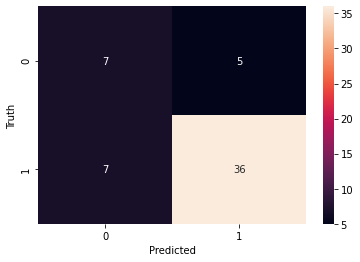

In [78]:
import seaborn as sn
#plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')